___
# Ciência dos Dados - PROJETO 1

GABRIEL MOURA ALMEIDA

Análise do uso de aparelhos eletrônicos em domicílios de acordo com as faixas de renda mensais, no estado de São Paulo.

___
## Introdução


Pretendo neste estudo analisar e comparar o número de domicílios que possuem aparelhos eletrônicos como: microcomputadores, celulares e televisões em diferentes anos e faixas de salários mínimos mensais nos domicílios, no estado de São Paulo.


Objetivo: Saber qual dos 3 aparelhos eletrônicos cada faixa de salário mínimo apresenta mais em seus domicílios e como isso se comporta ao longo dos anos.

Principais perguntas: 
•	Qual dos 3 aparelhos eletrônicos: televisões, microcomputadores ou celulares aparecem mais nos domicílios do estado de São Paulo , de acordo com cada faixa de salário mínimo de renda mensal?
•   Há crescimento ou não no número de domicílios que possuem cada aparelho eletrônico citado?


Variáveis de Interesse:
- Tem telefone móvel celular
- Tem televisão em cores
- Microcomputador é utilizado para acessar a Internet
- Número de Salários Mínimos por rendimento mensal domiciliar


Filtro de Tipos de Domicílios
- Unidade da Federação
- Renda Mensal Domiciliar


___
## Análise e Resultados

In [2]:
# Projeto1CD
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#2009
dados = pd.read_csv('PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv',sep=',') #abrindo a PNAD 2009
# Definindo varíaveis das colunas
dados = dados.rename(columns={"UF":"Estados","V4622":"Salario","V2020":"Celular","V4621":"Renda","V0226":"Televisão","V0232":"Microcomputador","V2123":"Menor"})
dados_resumidos = dados[dados.Estados == 35] #filtragem para São Paulo 
# Selecionando colunas
dados_resumidos = dados_resumidos.ix[:, ["Celular","Salario","Televisão","Microcomputador","Renda","Total de moradores","CódigoCensitário","Menor"]]
# Trasnformando varíaveis em qualitativas
dados_resumidos.Celular = dados_resumidos.Celular.astype('category')
dados_resumidos.Televisão = dados_resumidos.Televisão.astype('category')
dados_resumidos.Microcomputador = dados_resumidos.Microcomputador.astype('category')
dados_resumidos.CódigoCensitário= dados_resumidos.CódigoCensitário.astype('category')
dados_resumidos.Menor = dados_resumidos.Menor.astype('category')
dados_resumidos.Salario = dados_resumidos.Salario.astype('category')
# Definindo categorias das variáveis qualitativas
dados_resumidos.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos.Menor.cat.categories = ('Sim','Não')
dados_resumidos.Salario.cat.categories = ("0","Até 1/4 de salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","N")
# Tirando NAN e null
dados_resumidos= dados_resumidos[dados_resumidos.Microcomputador.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Celular.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Televisão.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Menor.notnull()]

Após selecionar as variáveis de interesse , transformá-las em varíaveis qualitativas e definir as categorias para cada varíavel, vamos construir gráficos de pizza para cada um dos aparelhos eletrônicos (celular,televisão e microcomputador) para podermos analisar a porcentagem de pessoas que possuem e que não possuem cada tipo de aparelho no Estado de São Paulo no ano de 2009.

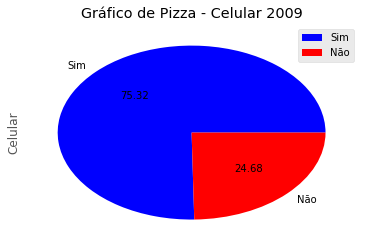

In [3]:
# Gráficos de Pizza
dfc = dados_resumidos.Celular.value_counts(True)
dfc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True,title='Gráfico de Pizza - Celular 2009')

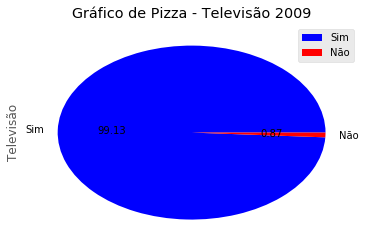

In [4]:
dfc1 = dados_resumidos.Televisão.value_counts(True)
dfc1.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True,title='Gráfico de Pizza - Televisão 2009')


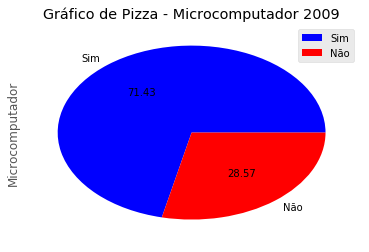

In [5]:
dfc2 = dados_resumidos.Microcomputador.value_counts()
dfc2.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True,title='Gráfico de Pizza - Microcomputador 2009')


Vamos analisar agora gráficos stacked da porcentagem de domicílios que possuem ou não os já citados aparelhos eletrônicos, divididos por faixas de salários mínimos, no ano de 2009:

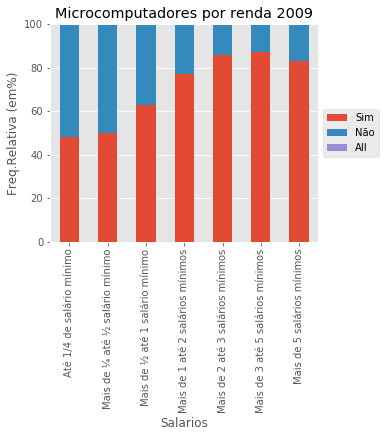

In [6]:
#Função que transforma em porcentagem
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

#Gráfico de porcentagem de microcomputadores por salários mínimos em 2009.
ct3 = pd.crosstab(dados_resumidos.Microcomputador,dados_resumidos.Salario,margins=True,rownames=['Computador'],colnames=['Salarios']).apply(percConvert, axis=0)
ct3 = ct3.iloc[:,1:8] #Salários de Interesse
plot = ct3.T.plot(kind='bar', stacked=True,title='Microcomputadores por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
#Ajustando Legenda
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



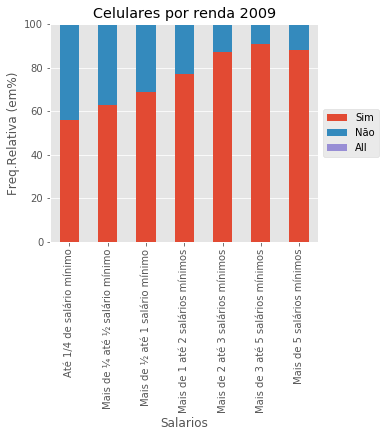

In [7]:
#Gráfico de porcentagem de celulares por salários mínimos em 2009.
ct1 = pd.crosstab(dados_resumidos.Celular,dados_resumidos.Salario,margins=True,rownames=['Celular'],colnames=['Salarios']).apply(percConvert, axis=0)
ct1 = ct1.iloc[:,1:8]
plot = ct1.T.plot(kind='bar', stacked=True,title='Celulares por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

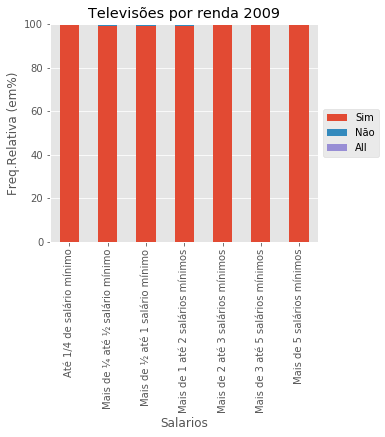

In [8]:
# Gráfico de porcentagem de televisões por salários mínimos 2009.
ct2 = pd.crosstab(dados_resumidos.Televisão,dados_resumidos.Salario,margins=True,rownames=['Telvisão'],colnames=['Salarios']).apply(percConvert, axis=0)
ct2 = ct2.iloc[:,1:8]
plot = ct2.T.plot(kind='bar', stacked=True,title='Televisões por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Por fim, faremos um gráfico final para podermos analisar todas as informações obtidas:

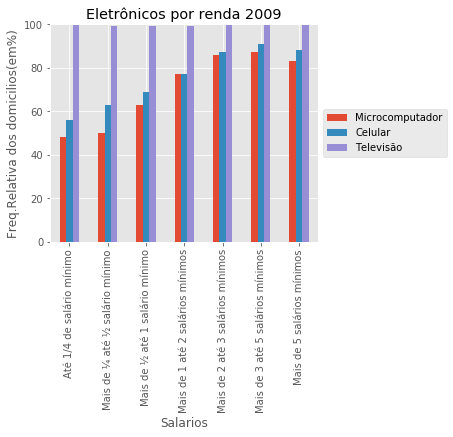

In [11]:
#GráficoMatador2009

#Porcentagens de sim para aparelho eletrônico.]04 h
t1 = ct3.T
t1 = t1.iloc[:, 0]
t2 = ct1.T
t2 = t2.iloc[:, 0]
t3 = ct2.T
t3 = t3.iloc[:, 0]
#Novo Dataframe com porcentagens de sim para cada aparelho eletrônico.
data1 = {
'Microcomputador': t1,
'Celular': t2,
'Televisão': t3
}
dd = pd.DataFrame(data1, columns=['Microcomputador','Celular','Televisão'])

#Gráfico
plotf1 = dd.plot(kind='bar',title='Eletrônicos por renda 2009')
plotf1.set_ylim([0, 100])
plt.ylabel('Freq.Relativa dos domicilios(em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [10]:
A tabela com os números das porcentagens, necessária para se obter o gráfico:

SyntaxError: invalid syntax (<ipython-input-10-24e3e9f6ea8e>, line 1)

In [ ]:
dd

Agora vamos repetir o processo para o ano de 2015:

In [ ]:
#2015
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados2 = pd.read_csv('PNAD/PNAD DOM2015/DOM2015csv/DOM2015.csv',sep=',')
dados2 = dados2.rename(columns={"UF":"Estados","V4622":"Salario","V0220":"Celular","V4621":"Renda","V0226":"Televisão","V0231":"Microcomputador"})
dados_resumidos2 = dados2[dados2.Estados == 35] #filtragem para São Paulo 

#Varíaveis de Interesse
dados_resumidos2 = dados_resumidos2.ix[:, ["Salario","Celular","Televisão","Microcomputador","Renda"]]
#Tranformando em qualitativa
dados_resumidos2.Celular = dados_resumidos2.Celular.astype('category')
dados_resumidos2.Televisão = dados_resumidos2.Televisão.astype('category')
dados_resumidos2.Microcomputador = dados_resumidos2.Microcomputador.astype('category')
dados_resumidos2.Salario = dados_resumidos2.Salario.astype('category')
#Definindo categorias
dados_resumidos2.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos2.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos2.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos2.Salario.cat.categories = ("0","Até 1/4 de salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","N")
#Tirando Not e Null
dados_resumidos2= dados_resumidos2[dados_resumidos2.Microcomputador.notnull()]
dados_resumidos2= dados_resumidos2[dados_resumidos2.Celular.notnull()]
dados_resumidos2= dados_resumidos2[dados_resumidos2.Televisão.notnull()]








In [ ]:
ctt1 = pd.crosstab(dados_resumidos2.Microcomputador,dados_resumidos2.Salario,margins=True,rownames=['Computador'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt1 = ctt1.iloc[:,1:8]
plot1 = ctt1.T.plot(kind='bar', stacked=True,title='Microcomputadores por renda 2015')
plot1.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

trans1 = ctt1.T
trans1 = trans1.iloc[:, 0]

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ctt2 = pd.crosstab(dados_resumidos2.Celular,dados_resumidos2.Salario,margins=True,rownames=['Celular'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt2= ctt2.iloc[:,1:8]
plot2 = ctt2.T.plot(kind='bar', stacked=True,title='Celulares por renda 2015')
plot2.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

trans2 = ctt2.T
trans2 = trans2.iloc[:, 0]

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ctt3 = pd.crosstab(dados_resumidos2.Televisão,dados_resumidos2.Salario,margins=True,rownames=['Televisão'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt3 = ctt3.iloc[:,1:8]
plot3 = ctt3.T.plot(kind='bar', stacked=True,title='Televisão por renda 2015')
plot3.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

trans3 = ctt3.T
trans3 = trans3.iloc[:, 0]

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
#GráficoMatador2015
data = {
'Microcomputador': trans1,
'Celular': trans2,
'Televisão': trans3
}
ddd = pd.DataFrame(data, columns=['Microcomputador','Celular','Televisão'])

plotf2 = ddd.plot(kind='bar',title='Eletrônicos por renda 2015')
plotf2.set_ylim([0, 100])
plt.ylabel('Freq.Relativa dos domicilios(em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [ ]:
ddd

___
## Conclusão 

Com as tabelas e gráficos obtidos, podemos concluir que para todos os números de salários mínimos de rendas mensais domiciliares  a Televisão é o aparelho eletrônico que mais aparece nos domicílios do estado de São Paulo. Em ambos os anos, os números de domicílios com televisão foram maiores que 95%, em todas as faixas de salário mínimo. 

O número de domicílios que possuem celulares apresenta um grande crescimento entre os anos, principalmente nas faixas de salários mínimos menores, chegando a ser maior que 90% em todo o estado de São Paulo no ano de 2015. Dessa forma, o segundo aparelho que mais aparecem nos domicílios de São Paulo são os celulares, para todas as faixas de salário mínimo.

Os microcomputadores ficam em terceiro lugar entre os aparelhos que mais aparecem nos domicílios do estado, e diferentes dos celulares, o número de domicílios que possuem microcomputadores apresenta uma queda entre os anos em todas as faixas de salários mínimos, exceto na faixa de mais de 5 salários mínimos por renda mensal domiciliar.

Portanto a televisão é o aparelho eletrônico que mais se apresenta nos domicílios de São Paulo, seguido de celulares e microcomputadores (entre os estudados). O número de domicílios de São Paulo que possuem televisões e celulares cresceram ao longo dos anos, algo que ocorre apenas na faixa de mais de 5 salários mínimos para o número de domicílios com microcomputadores.

In [ ]:

plotf1 = dd.plot(kind='bar',title='Eletrônicos por renda 2009')
plotf1.set_ylim([0, 100])
plt.ylabel('Freq.Relativa dos domicilios(em%)')
plt.xlabel('Renda')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plotf2 = ddd.plot(kind='bar',title='Eletrônicos por renda 2015')
plotf2.set_ylim([0, 100])
plt.ylabel('Freq.Relativa dos domicilios(em%)')
plt.xlabel('Renda')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()